# Principal Component Analysis
## 90-803 Machine Learning Foundations with Python (Spring 2024)
### Team 17: Yoko, Tessa, Hannah

This notebook attempts to employ Principal Component Analysis (PCA) to reduce our dataset's dimensionality and improve our models' performance.

## Importing the Relevant Libraries

In [13]:
# common libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# scalers
from sklearn.preprocessing import StandardScaler

# PCA libraries
from sklearn.decomposition import PCA
from yellowbrick.features import PCA as PCA_viz


## Initial Exploration
We will first explore the dataset and pick the appropriate columns for unsurpervised learning (numerical features).

In [14]:
# read in the dataset
data = pd.read_csv("all_data_geo.csv", index_col=0)
data.head()

,Year,Month,RegionName,State,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate,Average Temperature Value,Anomaly (1901-2000 base period),1901-2000 Mean,Initial Fees and Charges (%),Effective Rate (%),Term to Maturity,Loan Amount ($thou),Purchase Price ($thou),Loan-to-Price Ratio (%),Share of Total Market (%),ALAND,AWATER,INTPTLAT,INTPTLON
0,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,0.93,8.01,15,103.0,173.6,64.7,7.0,10515988166,1785003207,34.196398,-118.261862
1,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,0.81,8.20,30,129.9,166.8,81.1,61.1,10515988166,1785003207,34.196398,-118.261862
2,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,0.93,8.01,15,103.0,173.6,64.7,7.0,2447342616,1786339408,41.894294,-87.645455
3,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,0.81,8.20,30,129.9,166.8,81.1,61.1,2447342616,1786339408,41.894294,-87.645455
4,2000,1,Harris County,TX,61195.175569,217850.462915,57.4,5.6,51.8,0.93,8.01,15,103.0,173.6,64.7,7.0,4421145870,182187806,29.857273,-95.393037


In [15]:
data = data[data['State'].isin(['LA', 'MS','AL', 'SC','GA','NC', 'VA', 'TN', 'AK'])]
data.head()

,Year,Month,RegionName,State,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate,Average Temperature Value,Anomaly (1901-2000 base period),1901-2000 Mean,Initial Fees and Charges (%),Effective Rate (%),Term to Maturity,Loan Amount ($thou),Purchase Price ($thou),Loan-to-Price Ratio (%),Share of Total Market (%),ALAND,AWATER,INTPTLAT,INTPTLON
76,2000,1,Fairfax County,VA,126102.288249,337068.727896,33.7,0.5,33.2,0.93,8.01,15,103.0,173.6,64.7,7.0,1012738308,40071741,38.829520,-77.273252
77,2000,1,Fairfax County,VA,126102.288249,337068.727896,33.7,0.5,33.2,0.81,8.20,30,129.9,166.8,81.1,61.1,1012738308,40071741,38.829520,-77.273252
78,2000,1,Wake County,NC,122502.865168,312261.033536,38.9,-1.3,40.2,0.93,8.01,15,103.0,173.6,64.7,7.0,2161634072,58017921,35.789846,-78.650624
79,2000,1,Wake County,NC,122502.865168,312261.033536,38.9,-1.3,40.2,0.81,8.20,30,129.9,166.8,81.1,61.1,2161634072,58017921,35.789846,-78.650624
80,2000,1,Mecklenburg County,NC,86456.490969,280667.286918,39.8,-0.7,40.5,0.93,8.01,15,103.0,173.6,64.7,7.0,1356132970,58206612,35.246862,-80.833832


In [16]:
# we can only do unsupervised learning on certain columns so we need to get the numeric columns we need out and changed "value" to "temperature for more clarity"
unsupervised = data[data.columns.difference(['State', 'RegionName'])]
unsupervised.head(5)

,1901-2000 Mean,ALAND,AWATER,Anomaly (1901-2000 base period),Average Temperature Value,Bottom-Tier Average Home Value Estimate,Effective Rate (%),INTPTLAT,INTPTLON,Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Month,Purchase Price ($thou),Share of Total Market (%),Term to Maturity,Top-Tier Average Home Value Estimate,Year
76,33.2,1012738308,40071741,0.5,33.7,126102.288249,8.01,38.829520,-77.273252,0.93,103.0,64.7,1,173.6,7.0,15,337068.727896,2000
77,33.2,1012738308,40071741,0.5,33.7,126102.288249,8.20,38.829520,-77.273252,0.81,129.9,81.1,1,166.8,61.1,30,337068.727896,2000
78,40.2,2161634072,58017921,-1.3,38.9,122502.865168,8.01,35.789846,-78.650624,0.93,103.0,64.7,1,173.6,7.0,15,312261.033536,2000
79,40.2,2161634072,58017921,-1.3,38.9,122502.865168,8.20,35.789846,-78.650624,0.81,129.9,81.1,1,166.8,61.1,30,312261.033536,2000
80,40.5,1356132970,58206612,-0.7,39.8,86456.490969,8.01,35.246862,-80.833832,0.93,103.0,64.7,1,173.6,7.0,15,280667.286918,2000


In [17]:
# double check NaN values one more time
unsupervised.isnull().sum()

1901-2000 Mean                             0
ALAND                                      0
AWATER                                     0
Anomaly (1901-2000 base period)            0
Average Temperature Value                  0
Bottom-Tier Average Home Value Estimate    0
Effective Rate (%)                         0
INTPTLAT                                   0
INTPTLON                                   0
Initial Fees and Charges (%)               0
Loan Amount ($thou)                        0
Loan-to-Price Ratio (%)                    0
Month                                      0
Purchase Price ($thou)                     0
Share of Total Market (%)                  0
Term to Maturity                           0
Top-Tier Average Home Value Estimate       0
Year                                       0
dtype: int64

In [18]:
# shape of the dataset
unsupervised.shape

(154470, 18)

In [19]:
# any scaling necessary? (of course, the answer is yes)
unsupervised.describe()

,1901-2000 Mean,ALAND,AWATER,Anomaly (1901-2000 base period),Average Temperature Value,Bottom-Tier Average Home Value Estimate,Effective Rate (%),INTPTLAT,INTPTLON,Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Month,Purchase Price ($thou),Share of Total Market (%),Term to Maturity,Top-Tier Average Home Value Estimate,Year
count,154470.000000,1.544700e+05,1.544700e+05,154470.000000,154470.000000,154470.000000,154470.000000,154470.000000,154470.000000,154470.000000,154470.000000,154470.000000,154470.000000,154470.000000,154470.000000,154470.000000,1.544700e+05,154470.000000
mean,60.192874,1.277079e+09,9.809133e+07,1.111346,61.303416,79632.824324,4.987937,34.456148,-83.571541,0.883357,176.705888,72.435137,6.436512,259.688786,37.335052,22.500000,2.510300e+05,2010.577018
std,13.874018,6.129936e+08,3.602949e+08,3.123546,14.006232,45199.002757,1.244128,2.129567,4.065878,0.367197,37.129470,8.645055,3.467018,36.921130,29.148621,7.500024,1.056300e+05,5.422363
min,30.100000,6.733299e+07,1.561440e+05,-10.700000,24.200000,12458.303623,2.890000,29.282447,-93.884970,0.180000,60.300000,42.300000,1.000000,124.000000,1.300000,15.000000,8.459675e+04,2000.000000
25%,48.300000,8.265700e+08,8.090235e+06,-0.900000,49.700000,48832.284374,3.990000,32.820008,-86.099203,0.530000,149.800000,67.000000,3.000000,237.400000,7.700000,15.000000,1.841795e+05,2006.000000
50%,60.100000,1.219225e+09,1.807693e+07,1.000000,61.800000,69034.898023,4.690000,34.763109,-83.581905,0.890000,179.000000,74.800000,6.000000,262.400000,32.450000,22.500000,2.219011e+05,2011.000000
75%,73.400000,1.580798e+09,4.375126e+07,3.000000,74.300000,99001.425382,5.980000,36.062525,-80.665164,1.220000,202.900000,80.300000,9.000000,285.900000,65.400000,30.000000,2.855439e+05,2015.000000
max,82.800000,4.117725e+09,4.628435e+09,14.800000,90.500000,376288.084337,8.550000,39.203660,-75.767536,1.510000,254.800000,83.500000,12.000000,347.300000,82.900000,30.000000,1.031439e+06,2019.000000


In [20]:
# It also seems Term to Maturity is actually categorical, along with Month and Year
unsupervised['Term to Maturity'].unique()

array([15, 30], dtype=int64)

Initial exploration shows that we must (1) drop categorical values and (2) scale our dataset. Many clustering methods do not work well with mixed data, and we have mostly numerical data. Dropping the categorical values will help the algorithms, but we should keep in mind that the clustering we uncovered might be heavily influenced by the dropped categorical values. Scaling the dataset helps clustering methods, especially those that rely on the distance between data points as well as PCA.

## Getting the right dataset for clustering
These steps include dropping categorical features and scaling the data. We will use standard scaler because PCA relys on zero-centered input.


In [21]:
#dropping year, month, and term to maturity (categorical) 
cols = ['Month', 'Year', 'Term to Maturity']
unsupervised = unsupervised.drop(columns=cols)

In [22]:
#initalize a scaler
scaler = StandardScaler()

#scale the data
scaled_features = scaler.fit_transform(unsupervised)

# getting a scaled dataframe
X = pd.DataFrame(scaled_features, columns = unsupervised.columns)

#check out the first few rows
X.head()

,1901-2000 Mean,ALAND,AWATER,Anomaly (1901-2000 base period),Average Temperature Value,Bottom-Tier Average Home Value Estimate,Effective Rate (%),INTPTLAT,INTPTLON,Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Purchase Price ($thou),Share of Total Market (%),Top-Tier Average Home Value Estimate
0,-1.945576,-0.431230,-0.161034,-0.195722,-1.970802,1.028111,2.429069,2.053650,1.549065,0.127024,-1.985111,-0.894750,-2.331702,-1.040706,0.814532
1,-1.945576,-0.431230,-0.161034,-0.195722,-1.970802,1.028111,2.581787,2.053650,1.549065,-0.199777,-1.260617,1.002294,-2.515879,0.815305,0.814532
2,-1.441035,1.443014,-0.111224,-0.771992,-1.599537,0.948476,2.429069,0.626279,1.210300,0.127024,-1.985111,-0.894750,-2.331702,-1.040706,0.579677
3,-1.441035,1.443014,-0.111224,-0.771992,-1.599537,0.948476,2.581787,0.626279,1.210300,-0.199777,-1.260617,1.002294,-2.515879,0.815305,0.579677
4,-1.419411,0.128965,-0.110701,-0.579902,-1.535280,0.150970,2.429069,0.371304,0.673340,0.127024,-1.985111,-0.894750,-2.331702,-1.040706,0.280578


In [23]:
#double check the amount of data we have
X.shape

(154470, 15)

## PCA
Because we have a lot of data and features, many of which are correlated with one another (Average Temperature and Temperature 1901-200 Mean Temperature), we should do PCA. 


In [24]:
#initialize PCA
pca = PCA()

#get the PC dataframe
unsupervised_pca = pd.DataFrame(pca.fit_transform(X), columns=['V'+str(i) for i in range(1,X.shape[1]+1)], index=X.index)
unsupervised_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,3.228243,4.048329,-1.019470,-0.106107,0.331651,0.411623,-0.518345,0.135807,1.397964,0.127258,1.713407,-0.296947,-0.064819,-0.091918,-0.000042
1,1.988718,3.846158,-2.821133,1.435931,0.511421,0.485090,-0.493762,0.071235,1.291045,0.114152,1.087299,-0.358106,-0.096536,0.191762,-0.000041
2,3.244315,2.440388,-0.667059,-0.023777,1.582308,0.060134,-1.446765,-0.486306,1.413698,-0.733196,1.764794,-0.288175,-0.302786,-0.084791,-0.000059
3,2.004790,2.238216,-2.468722,1.518262,1.762078,0.133601,-1.422182,-0.550878,1.306780,-0.746302,1.138685,-0.349334,-0.334504,0.198889,-0.000059
4,3.429278,1.900667,-1.027410,-0.299005,0.909037,0.128497,-0.259061,-0.015309,1.369066,-0.475308,1.724734,-0.296752,0.091238,-0.091635,-0.000045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154465,-2.744822,1.573762,-0.931053,0.183197,-0.893047,0.292195,-0.130534,0.225835,-0.893279,0.498233,0.082502,-0.143980,0.004760,-0.185397,-0.000043
154466,-1.039745,-1.038593,0.872115,-1.549314,-1.162856,-0.278381,1.217023,0.697142,-0.526663,-0.469284,0.372462,-0.347322,0.260075,-0.091964,-0.000040
154467,-2.402389,-1.250092,-0.986776,0.045711,-0.979158,-0.215523,1.261837,0.586629,-0.970995,-0.452573,0.092579,-0.145277,0.237164,-0.185939,-0.000039
154468,-0.936428,-1.400891,0.715917,-1.670841,-1.120054,-0.637281,1.299040,0.828445,-0.527970,-0.444683,0.397318,-0.354099,0.232302,-0.090602,-0.000030


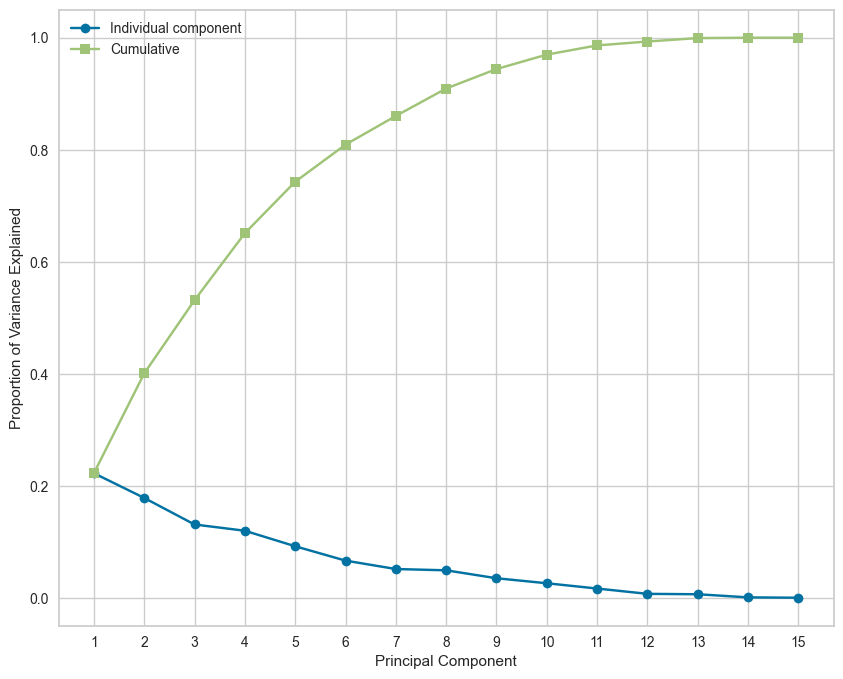

In [25]:
#graphing the cummulative explained variance plot
plt.figure(figsize=(10,8))

#create range of x ticks labels
feats = np.arange(len(pca.explained_variance_ratio_)) + 1

#plotting the lines
plt.plot(feats, pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(feats, np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

#annotating the graph
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(feats)
plt.legend(loc=2)

#showing the graph
plt.show();

We are going to work with 10 PCs because it seems to get us very close to 95% of the data explained. We won't need a perfect 100%.

In [26]:
pca = PCA(n_components=10)

#fit and transform X to get the principal components from PCA
X_pca = pd.DataFrame(pca.fit_transform(X), 
                 columns=['PC'+str(i) for i in range(1,11)])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.228243,4.048329,-1.019470,-0.106107,0.331651,0.411623,-0.518345,0.135807,1.397964,0.127258
1,1.988718,3.846158,-2.821133,1.435931,0.511421,0.485090,-0.493762,0.071235,1.291045,0.114152
2,3.244315,2.440388,-0.667059,-0.023777,1.582308,0.060134,-1.446765,-0.486306,1.413698,-0.733196
3,2.004790,2.238216,-2.468722,1.518262,1.762078,0.133601,-1.422182,-0.550878,1.306780,-0.746302
4,3.429278,1.900667,-1.027410,-0.299005,0.909037,0.128497,-0.259061,-0.015309,1.369066,-0.475308
...,...,...,...,...,...,...,...,...,...,...
154465,-2.744822,1.573762,-0.931053,0.183197,-0.893047,0.292195,-0.130534,0.225835,-0.893279,0.498233
154466,-1.039745,-1.038593,0.872115,-1.549314,-1.162856,-0.278381,1.217023,0.697142,-0.526663,-0.469284
154467,-2.402389,-1.250092,-0.986776,0.045711,-0.979158,-0.215523,1.261837,0.586629,-0.970995,-0.452573
154468,-0.936428,-1.400891,0.715917,-1.670841,-1.120054,-0.637281,1.299040,0.828445,-0.527970,-0.444683


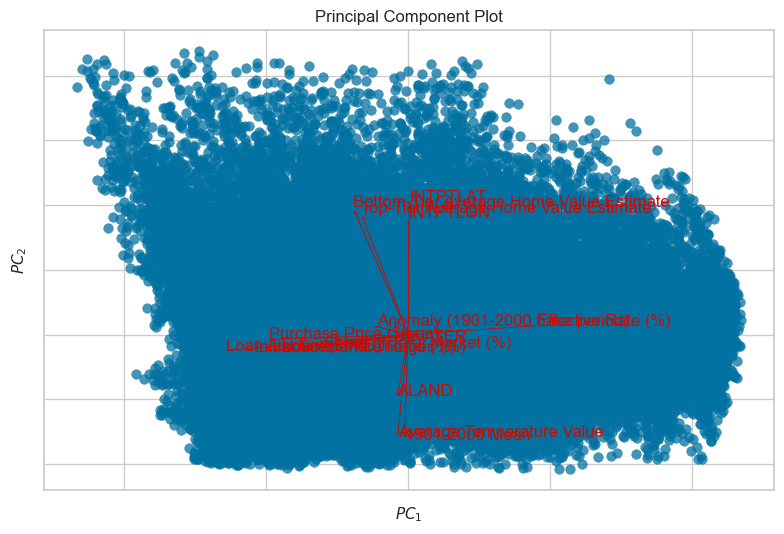

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [27]:
visualizer = PCA_viz(proj_features=True)
visualizer.fit_transform(X)
visualizer.show()

In [28]:
X_pca.to_csv("PCA_data.csv", index=False)

## References:
1. https://medium.com/@hhuseyincosgun/which-data-scaling-technique-should-i-use-a1615292061e
2. Lab 10 Solutions: https://canvas.cmu.edu/courses/38950/files/11085230?module_item_id=5780123&fd_cookie_set=1
3. In-class PCA Exercise Solutions: https://canvas.cmu.edu/courses/38950/files/11085228?module_item_id=5780124&fd_cookie_set=1